# Preliminaries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pylab as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
plt.rcParams['text.usetex'] = True

In [3]:
from dissipationtheory.constants import ureg, qe, epsilon0
from dissipationtheory.dissipation5 import CantileverModel, SampleModel1, SampleModel1Jit
from dissipationtheory.dissipation5 import theta1norm_jit, gamma_perpendicular_jit, blds_perpendicular_jit
from dissipationtheory.dissipation5 import ExptSweepConductivity
from dissipationtheory.dissipation5 import latex_float

In [4]:
THIS = 'dissipation-theory--Study-41--'
figs = {}

# Set up the sample

In [5]:
cantilever = CantileverModel(
    f_c = ureg.Quantity(75, 'kHz'),
    k_c = ureg.Quantity(2.8, 'N/m'), 
    V_ts = ureg.Quantity(1, 'V'), 
    R = ureg.Quantity(35, 'nm'),
    angle = ureg.Quantity(20, 'degrees'),
    d = ureg.Quantity(38, 'nm'),
    z_c = ureg.Quantity(73, 'nm')
)

In [6]:
mu = ureg.Quantity(1e-8, 'm^2/(V s)') 
sigma = ureg.Quantity(1E-5, 'S/m')
rho = (sigma / (qe * mu)).to('1/m^3')

In [7]:
sample1 = SampleModel1(
    cantilever = cantilever,
    h_s = ureg.Quantity(7300, 'nm'), # 100 times the sample-charge separation
    epsilon_s = ureg.Quantity(complex(20, -0.2), ''), 
    sigma = sigma,
    rho = rho,
    epsilon_d = ureg.Quantity(complex(1e6, 0), ''),
    z_r = ureg.Quantity(73, 'nm')
)

In [8]:
sample1_jit = SampleModel1Jit(**sample1.args())

In [9]:
N_omega = 50 # 10 or 100
N_sigma = 100 # 20 or 200

In [10]:
omega_m__array = ureg.Quantity(
    np.logspace(
        start=np.log10(1e1),
        stop=np.log10(1e8),
        num=N_omega), 'Hz')

In [11]:
sigma__array = ureg.Quantity(
    np.logspace(
        start=np.log10(1e-10),
        stop=np.log10(1e0),
        num=N_sigma), 'S/m')

In [12]:
mu = ureg.Quantity(1e-8, 'm^2/(V s)') 
rho__array = (sigma__array / (qe * mu)).to('1/m^3')

# Run the simulation

In [13]:
%%time

expt = {}
expt['01'] = ExptSweepConductivity('perovskite-like sample')
expt['01'].calculate(theta1norm_jit, sample1_jit, omega_m__array, rho__array, sigma__array)

CPU times: user 4.86 s, sys: 101 ms, total: 4.96 s
Wall time: 5.7 s


Examine the data

In [14]:
expt['01'].df.iloc[::10]

,sigma [S/m],rho [1/cm^3],L_D [nm],rho scaled 1,rho scaled 2,rho scaled 3,omega0 [Hz],omega_c [Hz],omega_c scaled,omega_m [Hz],omega_m scaled,f_BLDS [Hz],gamma [pN s/m]
0,1.000000e-10,6.241509e+10,4784.333412,0.000233,0.000012,0.000002,1.129409e+01,471238.898038,0.000001,"[10.0, 13.894954943731374, 19.306977288832496,...","[17.708375625600002, 24.605708144438292, 34.18...","[-1.0613982458839308, -1.0613982423405754, -1....",0.084296
10,1.023531e-09,6.388378e+11,1495.446678,0.002383,0.000119,0.000015,1.155985e+02,471238.898038,0.000012,"[10.0, 13.894954943731374, 19.306977288832496,...","[1.730125931380609, 2.404002186351484, 3.34035...","[-1.0614092068486185, -1.0614091801149117, -1....",0.084355
20,1.047616e-08,6.538703e+12,467.434138,0.024390,0.001219,0.000158,1.183187e+03,471238.898038,0.000126,"[10.0, 13.894954943731374, 19.306977288832496,...","[0.16903502623404495, 0.23487340734345058, 0.3...","[-1.0615161576233199, -1.0615161157677493, -1....",0.084953
30,1.072267e-07,6.692566e+13,146.106629,0.249635,0.012482,0.001612,1.211028e+04,471238.898038,0.001285,"[10.0, 13.894954943731374, 19.306977288832496,...","[0.016514890376299794, 0.022947365767934852, 0...","[-1.0624409167172837, -1.062440914243618, -1.0...",0.091074
40,1.097499e-06,6.850049e+14,45.668781,2.555094,0.127755,0.016502,1.239525e+05,471238.898038,0.013152,"[10.0, 13.894954943731374, 19.306977288832496,...","[0.0016135212341350038, 0.002241980484905972, ...","[-1.0685764174099013, -1.0685764273609726, -1....",0.153327
50,1.123324e-05,7.011237e+15,14.274763,26.152180,1.307609,0.168898,1.268692e+06,471238.898038,0.134612,"[10.0, 13.894954943731374, 19.306977288832496,...","[0.00015764263120636354, 0.0002190437257823683...","[-1.0923859379999037, -1.0923859446754904, -1....",0.744037
60,1.149757e-04,7.176219e+16,4.461885,267.675675,13.383784,1.728724,1.298546e+07,471238.898038,1.377800,"[10.0, 13.894954943731374, 19.306977288832496,...","[1.540184203834667e-05, 2.1400790117329475e-05...","[-1.1320619238671337, -1.1320619249610024, -1....",2.385453
70,1.176812e-03,7.345082e+17,1.394659,2739.743570,136.987178,17.694030,1.329102e+08,471238.898038,14.102211,"[10.0, 13.894954943731374, 19.306977288832496,...","[1.504775303221448e-06, 2.0908785038701737e-06...","[-1.1584585581785984, -1.158458558234887, -1.1...",0.532759
80,1.204504e-02,7.517920e+18,0.435931,28042.125358,1402.106268,181.103884,1.360377e+09,471238.898038,144.340506,"[10.0, 13.894954943731374, 19.306977288832496,...","[1.4701804547453147e-07, 2.0428091177840652e-0...","[-1.1684332235182349, -1.1684332235200998, -1....",0.062142
90,1.232847e-01,7.694824e+19,0.136260,287019.852235,14350.992612,1853.654432,1.392388e+10,471238.898038,1477.369856,"[10.0, 13.894954943731374, 19.306977288832496,...","[1.4363809433128806e-08, 1.9958448489366846e-0...","[-1.1716442925916648, -1.171644292591722, -1.1...",0.006746


# Plot the results

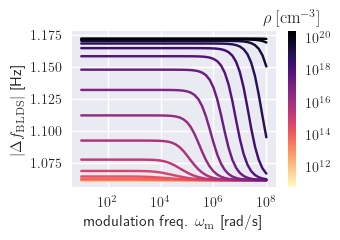

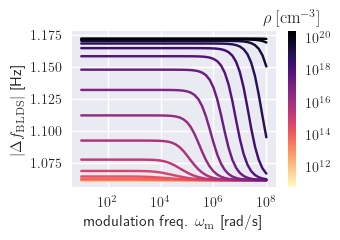

In [15]:
figs['01'] = expt['01'].plot_BLDS(n=5, scaled=False)
figs['01'] 

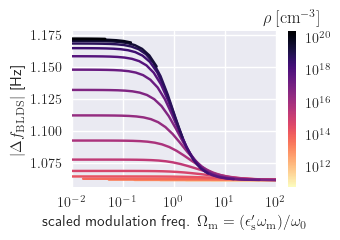

In [16]:
figs['02'] = expt['01'].plot_BLDS(n=5, scaled=True)
figs['02'].axes[0].set_xlim([1e-2,1e2]);
figs['02']

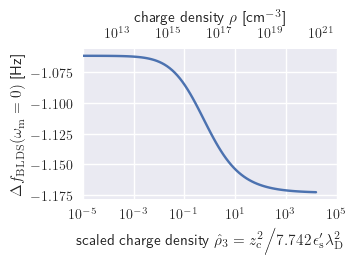

In [17]:
figs['03'] = expt['01'].plot_BLDS_zero()
figs['03'].axes[0].set_xlim([1e-5,1e5]);
figs['03']

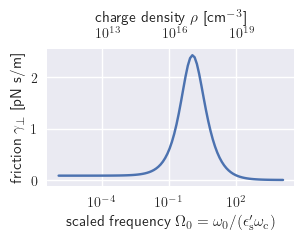

In [18]:
figs['04'] = expt['01'].plot_friction()
figs['04']

# Vary $\epsilon^{\prime\prime}_{\mathrm{r}}$

In [19]:
%%time

epsilon_s_start = sample1.epsilon_s
epsilon_list = [20-0.02j, 20-0.2j, 20-0.5j, 20-1j]

for key, epsilon_s in zip(['02a', '02b', '02c', '02d'], epsilon_list):
    
    sample1.epsilon_s = ureg.Quantity(epsilon_s, '')
    sample1_jit = SampleModel1Jit(**sample1.args())

    expt[key] = ExptSweepConductivity('perovskite-like sample')
    expt[key].calculate(theta1norm_jit, sample1_jit, omega_m__array, rho__array, sigma__array)

sample1.epsilon_s = epsilon_s_start             # reset it
sample1_jit = SampleModel1Jit(**sample1.args()) # reset it

CPU times: user 16.9 s, sys: 243 ms, total: 17.2 s
Wall time: 18.4 s


Use the first data set to create the figure.  Then add the plots for the subsequent three datasets to the figure.  Finally, a legend covering all four datasets.

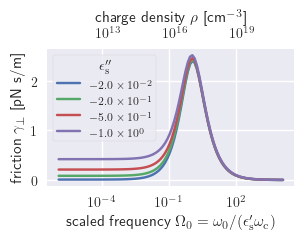

In [20]:
figs['05'] = expt['02a'].plot_friction()

with plt.style.context('seaborn-v0_8'):

    for key in ['02b', '02c', '02d']:

        figs['05'].axes[0].semilogx(
            expt[key].df['omega_c scaled'].values,
            expt[key].df['gamma [pN s/m]'].values)

    figs['05'].axes[0].legend(
        [latex_float(ep.imag) for ep in epsilon_list], 
        title=r'$\epsilon_{\mathrm{s}}^{\prime\prime}$',
        fontsize=8,
        title_fontsize=10,
        frameon=True)

figs['05']

In [21]:
sample1

cantilever

         resonance freq = 75.000 kHz
                        = 4.712e+05 rad/s
        spring constant = 2.800 N/m
     tip-sample voltage = 1.000 V
                 radius = 35.000 nm
        cone half angle = 20.000 degree
                 height = 38.000 nm
  tip charge z location = 73.000 nm

semiconductor

             epsilon (real) = 20.000
             epsilon (imag) = -0.200
                  thickness = 7300.0 nm
               conductivity = 1.000e-05 S/m
             charge density = 6.242e+21 m^{-3}
           reference height = 7.300e+01 nm

         roll-off frequency = 1.129e+06 Hz
                   mobility = 1.000e-08 m^2/(V s)
         diffusion constant = 2.585e-10 m^2/s
               Debye length = 1.513e+01 nm
           diffusion length = 2.342e+01 nm
   effective epsilon (real) = 20.000
   effective epsilon (imag) = -2.597

dielectric

  epsilon (real) = 1000000.000
  epsilon (imag) = 0.000
       thickness = infinite

# Vary $\mu$

In [22]:
%%time

mu_list = [ureg.Quantity(val, 'cm^2/(V s)') for val in [1e-6, 1e-4, 1e-3, 1e-2]]

for key, mu in zip(['03a', '03b', '03c', '03d'], mu_list):
    
    rho__array = (sigma__array / (qe * mu)).to('1/m^3')
    
    expt[key] = ExptSweepConductivity('perovskite-like sample')
    expt[key].calculate(theta1norm_jit, sample1_jit, omega_m__array, rho__array, sigma__array)
    

CPU times: user 17.1 s, sys: 226 ms, total: 17.3 s
Wall time: 18.2 s


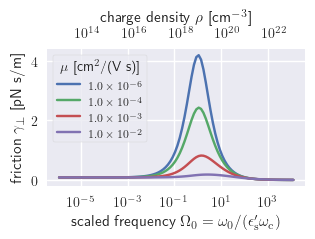

In [23]:
figs['06'] = expt['03a'].plot_friction()

with plt.style.context('seaborn-v0_8'):

    for key in ['03b', '03c', '03d']:

        figs['06'].axes[0].semilogx(
            expt[key].df['omega_c scaled'].values,
            expt[key].df['gamma [pN s/m]'].values)

    figs['06'].axes[0].legend(
        [latex_float(mu) for mu in [1e-6, 1e-4, 1e-3, 1e-2]], 
        title=r'$\mu$ [cm$^2$/(V s)]',
        fontsize=8,
        title_fontsize=10,
        frameon=True)

figs['06']

In [24]:
sample1

cantilever

         resonance freq = 75.000 kHz
                        = 4.712e+05 rad/s
        spring constant = 2.800 N/m
     tip-sample voltage = 1.000 V
                 radius = 35.000 nm
        cone half angle = 20.000 degree
                 height = 38.000 nm
  tip charge z location = 73.000 nm

semiconductor

             epsilon (real) = 20.000
             epsilon (imag) = -0.200
                  thickness = 7300.0 nm
               conductivity = 1.000e-05 S/m
             charge density = 6.242e+21 m^{-3}
           reference height = 7.300e+01 nm

         roll-off frequency = 1.129e+06 Hz
                   mobility = 1.000e-08 m^2/(V s)
         diffusion constant = 2.585e-10 m^2/s
               Debye length = 1.513e+01 nm
           diffusion length = 2.342e+01 nm
   effective epsilon (real) = 20.000
   effective epsilon (imag) = -2.597

dielectric

  epsilon (real) = 1000000.000
  epsilon (imag) = 0.000
       thickness = infinite

# Save the figures

In [25]:
if 1:
    for num in figs.keys():
        figname = THIS + "Fig-" + num
        figs[num].savefig(figname + '.png', dpi=300)
        figs[num].savefig(figname + '.pdf')

# Formatting notes

The header at the top of this file is for creating a nicely-formatted `.html` document using the program `quarto` ([link](https://quarto.org/)).  To create nicely-formated `.html`versions of this notebook, run `quarto` from the command line as follows

    quarto render dissipation-theory--Study-41.ipynb 

Other useful information about this notebook:

- Filename: `dissipation-theory--Study-41.ipynb`
- Continued from: `dissipation-theory--Study-34.ipynb`, `dissipation-theory--Study-39.ipynb`, and `dissipation-theory--Study-40.ipynb`
- Continued to: ---